### Problem Statement:

Product Reviews along with their sentiments are given which are classified using a Classification Model.

### Importing Libraries

In [1]:
#! pip install wordcloud

In [20]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score,classification_report
nltk.download('stopwords')
nltk.download('wordnet')
from warnings import filterwarnings
filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
data_prod=pd.read_csv("Participants_Data/products.csv")
data_prod.head()

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2


In [22]:
data_prod.shape

(6364, 4)

In [5]:
# Sentiment value counts
data_prod['Sentiment'].value_counts()

2    3765
3    2089
1     399
0     111
Name: Sentiment, dtype: int64

### Data Cleaning:

In [6]:
sentence=data_prod['Product_Description']
custom_stopwords=['mention','link','sxsw','elonsxsw','sxswh','rt','sxswi','quot']
stop_word=stopwords.words("english")

all_stopwords=np.hstack([custom_stopwords,stop_word])

lemm=WordNetLemmatizer()


new_review=[]
for i in range(len(sentence)):
    # Sentences must contain only letters
    words=re.sub("[^a-zA-Z]"," ",sentence[i])
    
    #Sentence should be lower case
    words=words.lower()
    
    #Splitting the sentences to list of words
    words=words.split()
    
    #Excluding stopwords from the list of words
    words=[lemm.lemmatize(w) for w in words if w not in all_stopwords]
    words=' '.join(words)
    new_review.append(words)
    
new_review[:10]

['web designer guide io android apps today',
 'line ipad longer today yesterday getting line today fun',
 'crazy apple opening temporary store austin tomorrow handle rabid eye pad seeker',
 'lesson google one pas digital environment user want purchase across every platform one tool',
 'panel mom ipad designing boomer',
 'think effing hubby line ipad someone point towards line wife number',
 'android user iphone user use option menu contextual menu',
 'wow interrupt regularly scheduled geek programming big news google circle',
 'google launch new social network called circle possibly today',
 'welcome enjoy ride anywhere austin dwnld groundlink app booth']

In [7]:
# Original reviews have been preprocessed
data_prod['Product_Description_words']=new_review
data_prod[['Product_Description','Product_Description_words']].head()

,Product_Description,Product_Description_words
0,The Web DesignerÛªs Guide to iOS (and Android...,web designer guide io android apps today
1,RT @mention Line for iPad 2 is longer today th...,line ipad longer today yesterday getting line ...
2,Crazy that Apple is opening a temporary store ...,crazy apple opening temporary store austin tom...
3,The lesson from Google One Pass: In this digit...,lesson google one pas digital environment user...
4,RT @mention At the panel: &quot;Your mom has a...,panel mom ipad designing boomer


### EDA

In [8]:
new_words=[]
for i in data_prod['Product_Description_words']:
    words=i.split()
    new_words.extend(words)

In [9]:
len(new_words)

59169

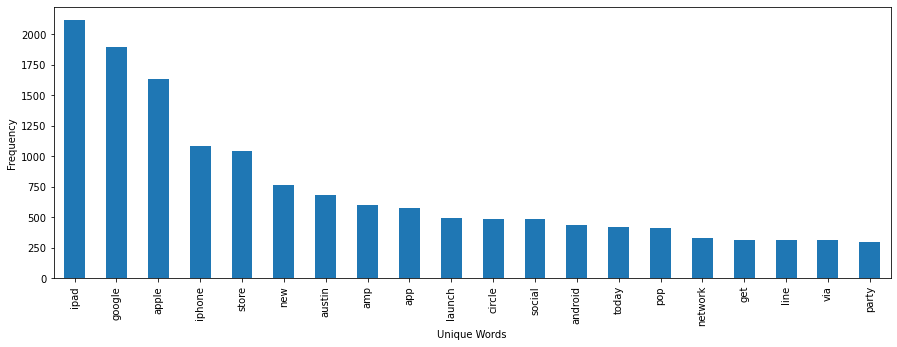

In [10]:
words_df=pd.Series(new_words).value_counts()
plt.figure(figsize=(15,5))
words_df[:20].plot(kind='bar')
plt.xlabel("Unique Words")
plt.ylabel("Frequency")
plt.show()

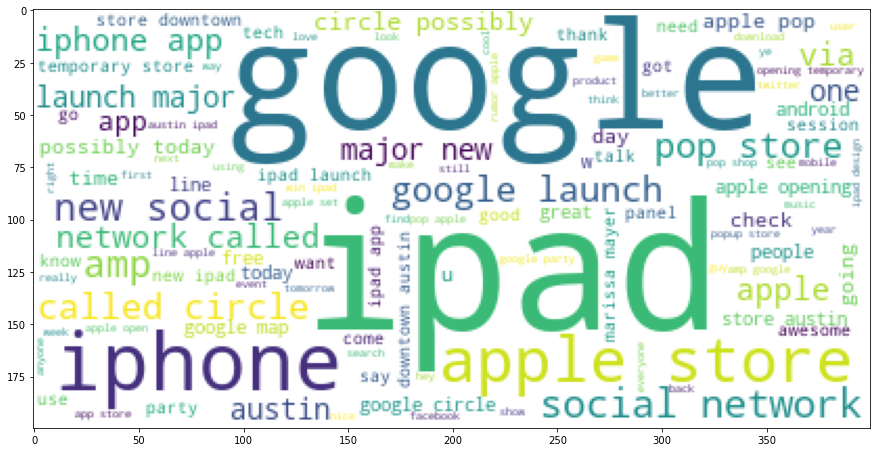

In [11]:
string_wc=" ".join(new_words)
plt.figure(figsize=(15,10))
wc=WordCloud(background_color='white').generate(string_wc)
plt.imshow(wc)
plt.show()

#### Inference: As per the plots above, the words ipad, google,iphone etc are among the words with highest frequency

### Data Vectorization:

In [12]:
# Considering TfidfVectorizer for converting the words to numbers since it gives less weightage to words with highest occurrence
# Keeping max_df as 2 .i.e if the word is present in more than 2 sentences, the word is not considered.
tfid=TfidfVectorizer(max_df=2)
vector=tfid.fit_transform(data_prod['Product_Description_words']).toarray()

In [13]:
# Dependent Variables
X=pd.DataFrame(vector,columns=tfid.get_feature_names())
X.head()

,aaron,aarpbulletin,abacus,abandoned,aber,abnormal,abroad,absolute,absolutely,absolutley,...,zimride,zing,zinio,zip,zite,zms,zone,zoom,zuckerberg,zynga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Dependent variable
y=data_prod['Sentiment']
y

0       2
1       2
2       2
3       2
4       2
       ..
6359    2
6360    1
6361    2
6362    2
6363    2
Name: Sentiment, Length: 6364, dtype: int64

### Building Classification Model:

In [15]:
# Splitting data into Train and Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [16]:
# Using Naive Baye's Model

nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [25]:
y_pred_train=nb.predict(X_train)
y_pred_test=nb.predict(X_test)

In [26]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.00      0.00      0.00       334
           2       0.69      1.00      0.82      3011
           3       0.98      0.43      0.60      1657

    accuracy                           0.73      5091
   macro avg       0.42      0.36      0.35      5091
weighted avg       0.73      0.73      0.68      5091



In [27]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        65
           2       0.60      0.97      0.74       754
           3       0.58      0.09      0.15       432

    accuracy                           0.60      1273
   macro avg       0.30      0.26      0.22      1273
weighted avg       0.55      0.60      0.49      1273

